In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Cargamos los datos

In [ ]:
df = pd.read_csv('SVR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-01,153.820007,153.979996,152.869995,153.460007,153.460007,4603600
1,2022-11-02,154.160004,155.419998,152.259995,152.389999,152.389999,7210900
2,2022-11-03,150.699997,151.960007,150.570007,151.809998,151.809998,5378800
3,2022-11-04,154.949997,156.600006,154.660004,156.470001,156.470001,7683800
4,2022-11-07,156.220001,156.570007,155.809998,155.850006,155.850006,4425700
5,2022-11-08,155.990005,159.869995,155.979996,159.449997,159.449997,11299600
6,2022-11-09,159.360001,160.350006,158.449997,158.649994,158.649994,6040600
7,2022-11-10,162.009995,163.509995,161.660004,163.479996,163.479996,9939900
8,2022-11-11,163.910004,164.580002,163.419998,164.559998,164.559998,4619100
9,2022-11-14,164.199997,165.240005,164.149994,164.919998,164.919998,6187600


In [ ]:
#mostramos las filas y columnas
df.shape

(20, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
#obtener la ultima fila 
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
19,2022-11-29,162.699997,163.630005,162.600006,162.729996,162.729996,2620600


In [ ]:
#preparar datos de entrenamiento  ek modelo sCR
#obtener todo los datos execpto la ultima fila

df = df.head(len(df)-1)
# print los nuevos datos
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-01,153.820007,153.979996,152.869995,153.460007,153.460007,4603600
1,2022-11-02,154.160004,155.419998,152.259995,152.389999,152.389999,7210900
2,2022-11-03,150.699997,151.960007,150.570007,151.809998,151.809998,5378800
3,2022-11-04,154.949997,156.600006,154.660004,156.470001,156.470001,7683800
4,2022-11-07,156.220001,156.570007,155.809998,155.850006,155.850006,4425700
5,2022-11-08,155.990005,159.869995,155.979996,159.449997,159.449997,11299600
6,2022-11-09,159.360001,160.350006,158.449997,158.649994,158.649994,6040600
7,2022-11-10,162.009995,163.509995,161.660004,163.479996,163.479996,9939900
8,2022-11-11,163.910004,164.580002,163.419998,164.559998,164.559998,4619100
9,2022-11-14,164.199997,165.240005,164.149994,164.919998,164.919998,6187600


In [ ]:
#create una lista vacia independiente y dependiente

days = list()
adj_close_prices = list()

In [ ]:
#obtener la fecha y el precio de cieree ajustado
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [ ]:
#create el conjunto de datos independiente
for day in df_days:
  days.append( [int(day.split('-')[2])] )


#create el conjunto de datos dependientes
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [ ]:
#
print(days)
print(adj_close_prices)

[[1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [25], [28]]
[153.460007, 152.389999, 151.809998, 156.470001, 155.850006, 159.449997, 158.649994, 163.479996, 164.559998, 164.919998, 165.5, 165.119995, 163.919998, 162.789993, 161.880005, 162.070007, 163.080002, 163.220001, 161.929993]


In [ ]:
#creamos el support vector regression models
# Create and train a SVR model using un kernel lineal

lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

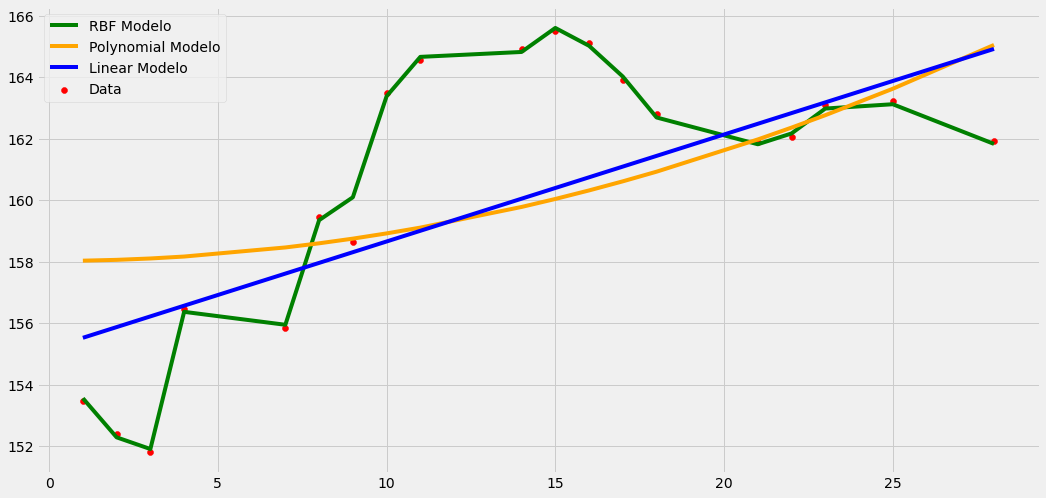

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Modelo')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Modelo')
plt.plot(days, lin_svr.predict(days), color = 'Blue', label='Linear Modelo')
plt.legend()
plt.show()

In [ ]:
day = [[30]]

print('The RBF SVR prediction', rbf_svr.predict(day))
print('The Lineal SVR prediction', lin_svr.predict(day))
print('The Polynomial SVR prediction', poly_svr.predict(day))

The RBF SVR prediction [160.53763905]
The Lineal SVR prediction [165.61526553]
The Polynomial SVR prediction [166.08687885]
